# Supervised learning 1
## Use-Case 1: 
* Fit a model using binary classification using logistic regression. 
* Identify correlated variables and form a less complex model. 

In [3]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

# For Evaluation 
import sklearn.metrics 

In [4]:
# Reading the dataset using pandas
data=pd.read_csv('voice.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
# Label Encosing
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])
print(data.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [8]:
# #Divide the dataset into independent and dependent variables
x=data.drop('label',axis=1)
y=data['label']
print(x)
print(y)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm      mode  ce

In [9]:
# Train Test Split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(x_train.head())
print(x_test.head())

(2534, 20) (634, 20)
(2534,) (634,)
      meanfreq        sd    median       Q25       Q75       IQR      skew  \
103   0.169506  0.066930  0.140971  0.124471  0.242634  0.118163  2.384672   
2824  0.238103  0.033586  0.242173  0.230661  0.256153  0.025492  2.441503   
710   0.155264  0.062908  0.151833  0.101222  0.208536  0.107314  3.299011   
445   0.189499  0.061545  0.210339  0.129564  0.242865  0.113301  1.611482   
2167  0.185433  0.027873  0.180916  0.172070  0.200379  0.028310  2.870837   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
103   10.239948  0.919991  0.484101  0.133934  0.169506  0.110566  0.017410   
2824   8.701877  0.803888  0.156152  0.231072  0.238103  0.181727  0.047478   
710   17.423865  0.905249  0.444301  0.105205  0.155264  0.097132  0.046948   
445    6.022266  0.922322  0.443907  0.237444  0.189499  0.115241  0.027875   
2167  11.700502  0.793607  0.157989  0.175166  0.185433  0.163497  0.039900   

        maxfun   mea

In [10]:
# Scaling the Features: Logistic regression performs better when the features are on a similar scale. 
# Standardize the features using StandardScaler before training:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# Train Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [12]:
# Checking prediction accuracy (Known data)
print(log_reg)
y_pred=log_reg.predict(x_train)
print(y_pred)
print("Train accuracy: ", sklearn.metrics.accuracy_score(y_train,y_pred))

LogisticRegression()
[1 0 1 ... 0 1 1]
Train accuracy:  0.9755327545382794


In [13]:
# Checking prediction accuracy (UnKnown data)
y_pred=log_reg.predict(x_test)
print(y_pred)
print("Test accuracy: ", sklearn.metrics.accuracy_score(y_test,y_pred))

[1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 0 1 

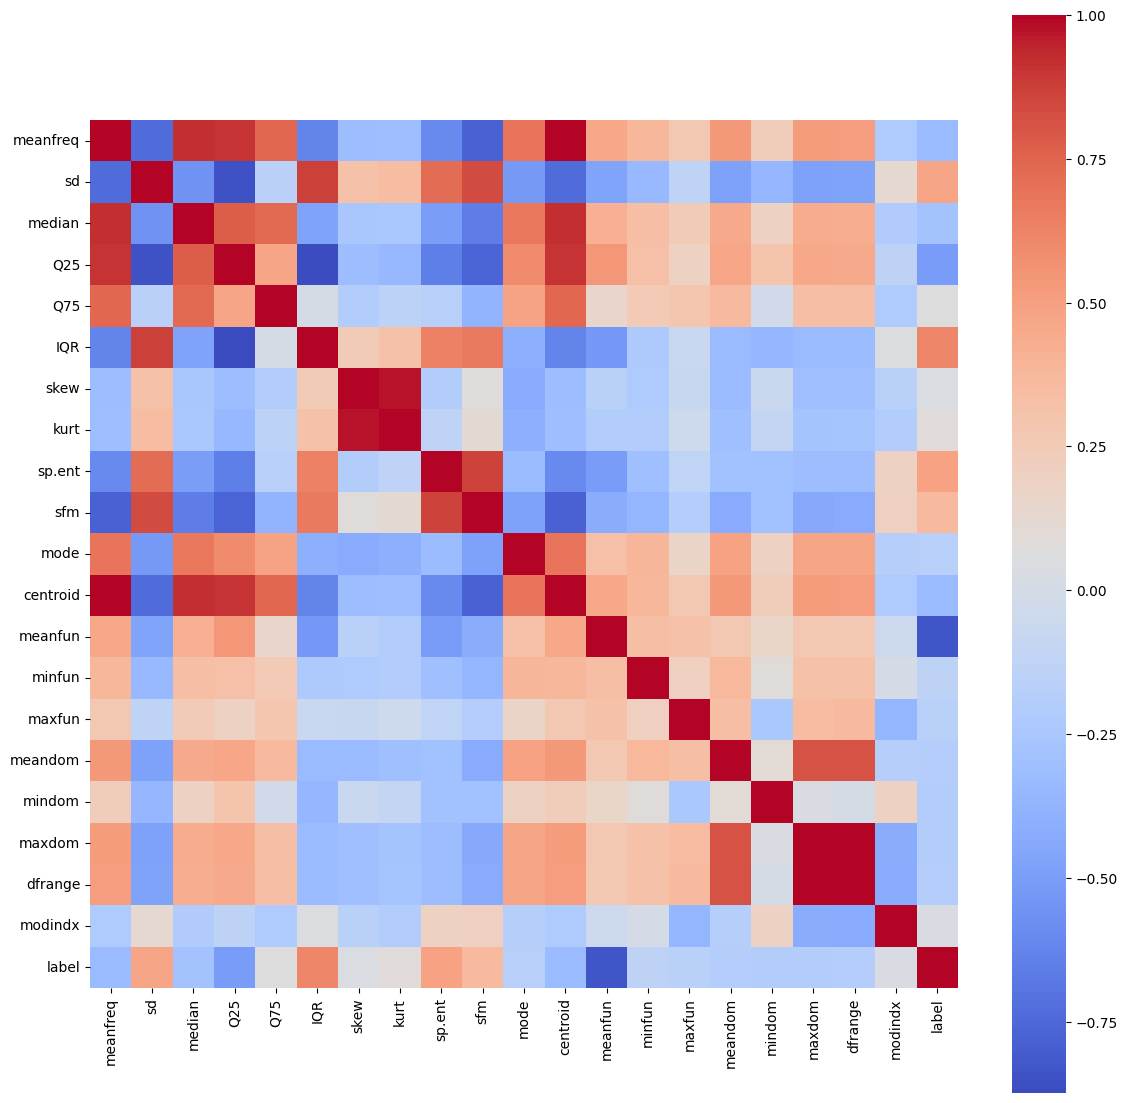

In [14]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

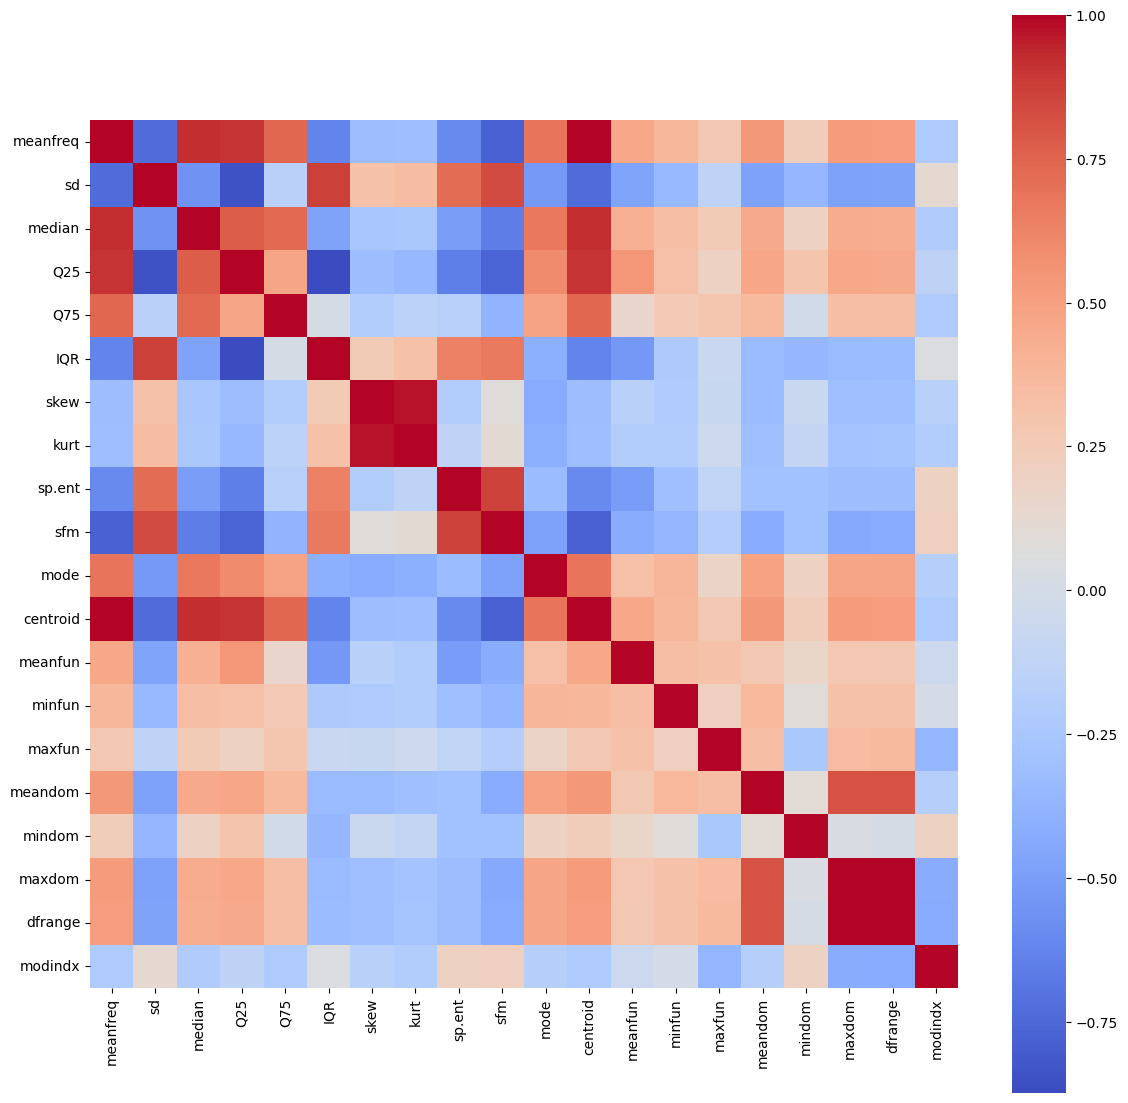

In [15]:
corr = x.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [16]:
# Features for the model ( remove collinearity)
# Removing multicollinearity helps achieve more stable, interpretable, and reliable coefficients.
# When highly correlated features are present in a logistic regression model, it can cause instability in the model’s coefficients.
# Instability increases the variance of the model, making it sensitive to small changes in the data and leading to a less generalizable model
# Consistent Feature Selection: Automate this feature selection by dropping one variable from each highly correlated pair. 
high_corr = corr[corr.abs() > 0.8]  # Using 0.8 as threshold for high correlation
correlated_features = set()
for i in range(len(high_corr.columns)):
    for j in range(i):
        if abs(high_corr.iloc[i, j]) > 0.8:  # Identify pairs above threshold
            colname = high_corr.columns[i]
            correlated_features.add(colname)

print("Correlated features: ", correlated_features)
x_reduced = x.drop(labels=correlated_features, axis=1)
print("Remaining features in x_reduced:", x_reduced.columns.tolist())

# Removing highly correlated features simplifies the model, stabilizes the logistic regression coefficients, and enhances generalization. 
# This approach ensures that the model is interpreting each feature independently, providing a clearer and more robust relationship with the target variable.

Correlated features:  {'maxdom', 'centroid', 'IQR', 'median', 'dfrange', 'kurt', 'sfm', 'Q25'}
Remaining features in x_reduced: ['meanfreq', 'sd', 'Q75', 'skew', 'sp.ent', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'modindx']


In [17]:
# Train Test Split 
x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.2) 
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2534, 12) (634, 12)
(2534,) (634,)


In [18]:
# Scaling the Features: Logistic regression performs better when the features are on a similar scale. 
# Standardize the features using StandardScaler before training:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
# Train Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
print(log_reg.coef_)
#print(x_reduced.head())

[[-2.5158779   0.11481689  1.95585723 -0.67704797 -0.1209037   0.32882936
  -4.90578437  0.72969117 -0.023395   -0.02471124 -0.10187979 -0.37149234]]
   meanfreq        sd       Q75       skew    sp.ent      mode   meanfun  \
0  0.059781  0.064241  0.090193  12.863462  0.893369  0.000000  0.084279   
1  0.066009  0.067310  0.092666  22.423285  0.892193  0.000000  0.107937   
2  0.077316  0.083829  0.131908  30.757155  0.846389  0.000000  0.098706   
3  0.151228  0.072111  0.207955   1.232831  0.963322  0.083878  0.088965   
4  0.135120  0.079146  0.206045   1.101174  0.971955  0.104261  0.106398   

     minfun    maxfun   meandom    mindom   modindx  
0  0.015702  0.275862  0.007812  0.007812  0.000000  
1  0.015826  0.250000  0.009014  0.007812  0.052632  
2  0.015656  0.271186  0.007990  0.007812  0.046512  
3  0.017798  0.250000  0.201497  0.007812  0.247119  
4  0.016931  0.266667  0.712812  0.007812  0.208274  


In [20]:
# Checking prediction accuracy (Known data)
print(log_reg)
y_pred=log_reg.predict(x_train)
print(y_pred)
print("Reduced Model Train accuracy: ", sklearn.metrics.accuracy_score(y_train,y_pred))

LogisticRegression()
[1 0 0 ... 0 0 1]
Reduced Model Train accuracy:  0.9719810576164167


In [21]:
# Checking prediction accuracy (UnKnown data)
y_pred=log_reg.predict(x_test)
print(y_pred)
print("Reduced Model Test accuracy: ", sklearn.metrics.accuracy_score(y_test,y_pred))

[0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 1 0 1 0 1 

In [22]:
# Adding Cross-Validation: To further validate the model, you might consider using cross-validation to ensure that the model’s performance is consistent. 
# Use cross_val_score from sklearn.model_selection:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_reduced, y, cv=5)
print("Cross-validated scores on reduced model:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validated scores on reduced model: [0.70031546 0.8533123  0.9384858  0.87045814 0.84992101]
Mean cross-validation score: 0.8424985423176402


### Cross-validation scores
The cross-validation scores obtained represent the accuracy of the logistic regression model on the reduced feature set across each fold in a 5-fold cross-validation.
* Cross-validation helps ensure that the model’s performance is consistent across different subsets of the data, reducing the chance of overfitting or underfitting.
* It provides a more robust measure of model accuracy than a single train-test split, especially for smaller datasets or when evaluating model stability.In your case, an average score of approximately 84.25% suggests that the model is fairly accurate with the reduced feature set, though the score may be slightly lower than when using the full feature set.
* Variations between the scores (e.g., 0.7003 in one fold versus 0.9385 in another) may indicate that model performance varies depending on the data split. Consistency across scores usually indicates more stable performance.
* The mean cross-validation score, 0.8425 (or about 84.25%), is the average accuracy across all five folds.
* This value gives a good estimate of how well the model is expected to perform on unseen data, providing a more reliable measure than a single train-test split.